# Data Visualization, Plots, and Graphs

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from scipy.stats import threshold
from mpl_toolkits.axes_grid1 import ImageGrid

Using TensorFlow backend.


## Data Visualization

In [2]:

img_width, img_height = 224, 224
batch_size = 16
test_data_dir = '../data/test'
model_name = 'minnet'

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)

Found 12500 images belonging to 1 classes.


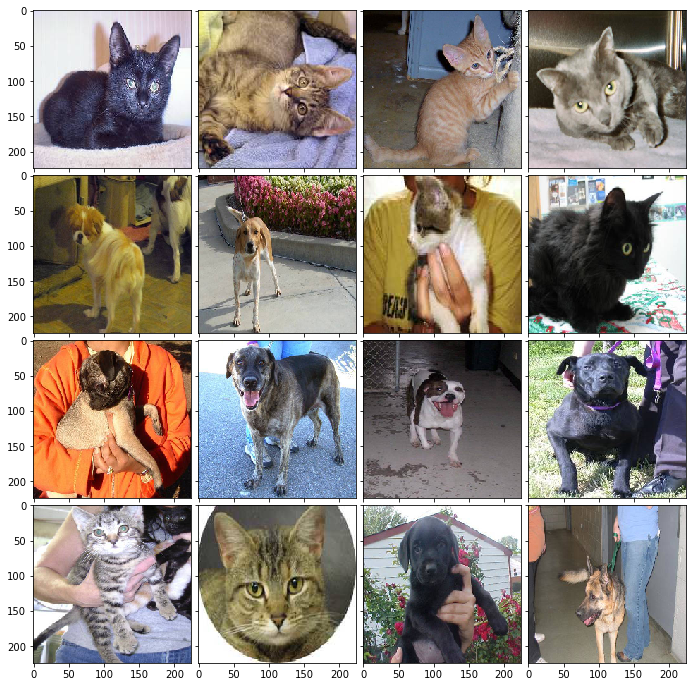

In [52]:
batch = test_generator.next()

imfig = plt.figure(1, (12., 12.))
grid = ImageGrid(imfig, 111, nrows_ncols=(4,4), axes_pad=0.1)

for i, img in enumerate(batch):
    grid[i].imshow(img)

plt.show()
imfig.savefig('../img/egdata.png')

## Accuracy and Loss Rate Graphs

In [4]:
minnet_data = pd.read_csv('../weights/minnet.csv')
minnet_data.describe()

,epoch,acc,loss,val_acc,val_loss
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,0.810261,0.402157,0.825334,0.384855
std,29.011492,0.068541,0.095634,0.065989,0.092750
min,0.000000,0.517090,0.286242,0.515121,0.264231
25%,24.750000,0.782593,0.330642,0.801194,0.319871
50%,49.500000,0.831299,0.375564,0.849085,0.350475
75%,74.250000,0.855103,0.450720,0.865473,0.435800
max,99.000000,0.882324,0.692091,0.892276,0.689436


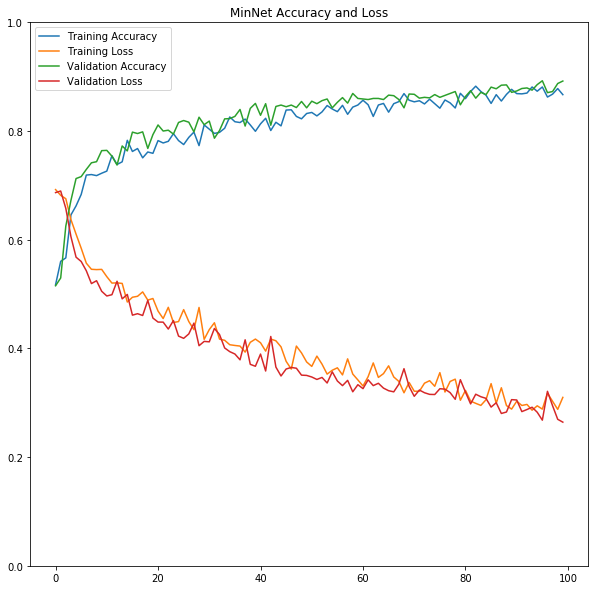

In [24]:
data = minnet_data
plt.figure(2, figsize=(10,10))

plt.subplot(111)
plt.plot(data.acc, label="Training Accuracy")
plt.plot(data.loss, label="Training Loss")
plt.plot(data.val_acc, label="Validation Accuracy")
plt.plot(data.val_loss, label="Validation Loss")
plt.title("MinNet Accuracy and Loss")
plt.ylim(0.0, 1.0)
plt.legend()

plt.show()
plt.savefig("minnet.png")

In [14]:
raw_resnet_data = pd.read_csv('../weights/raw_resnet.csv')
transfer_resnet_data = pd.read_csv('../weights/transfer_resnet.csv')

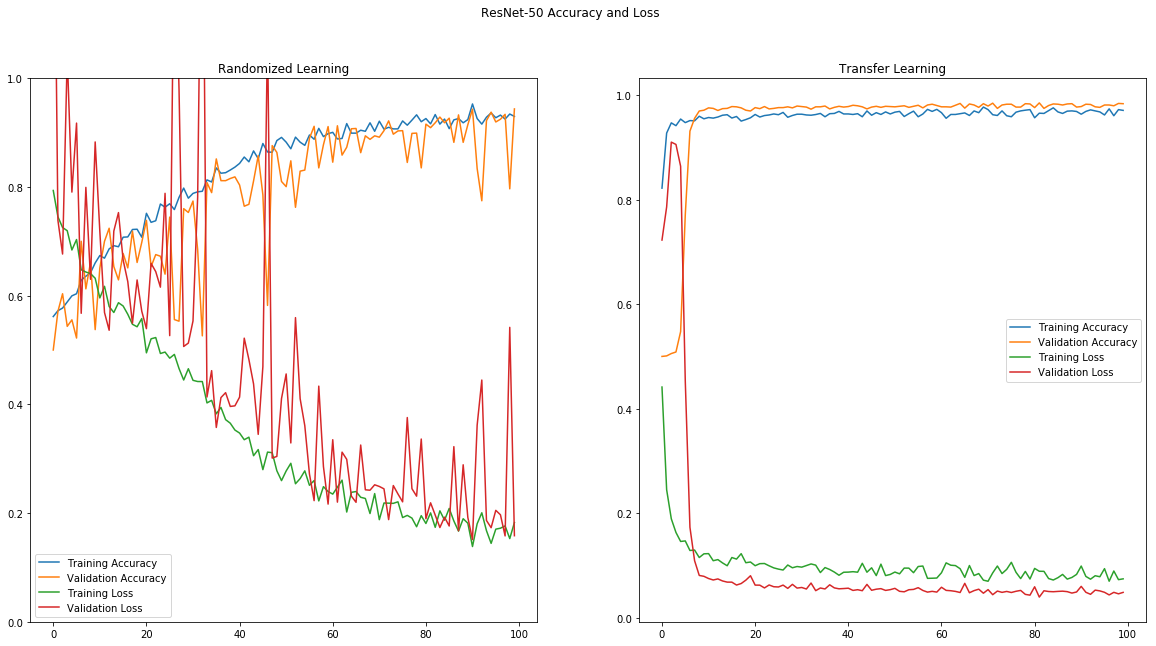

In [15]:
data = raw_resnet_data
plt.figure(3, figsize=(20,10))
plt.suptitle("ResNet-50 Accuracy and Loss")

plt.subplot(121)
plt.plot(data.acc, label="Training Accuracy")
plt.plot(data.val_acc, label="Validation Accuracy")
plt.plot(data.loss, label="Training Loss")
plt.plot(data.val_loss, label="Validation Loss")
plt.ylim(0, 1.0)
plt.legend()
plt.title("Randomized Learning")

data = transfer_resnet_data

plt.subplot(122)
plt.plot(data.acc, label="Training Accuracy")
plt.plot(data.val_acc, label="Validation Accuracy")
plt.plot(data.loss, label="Training Loss")
plt.plot(data.val_loss, label="Validation Loss")
plt.ylim(0, 1.0)
plt.legend()
plt.title("Transfer Learning")

plt.show()
plt.savefig("resnet.png")

In [16]:
raw_vgg16_data = pd.read_csv('../weights/raw_vgg16.csv')
transfer_vgg16_data = pd.read_csv('../weights/transfer_vgg16.csv')

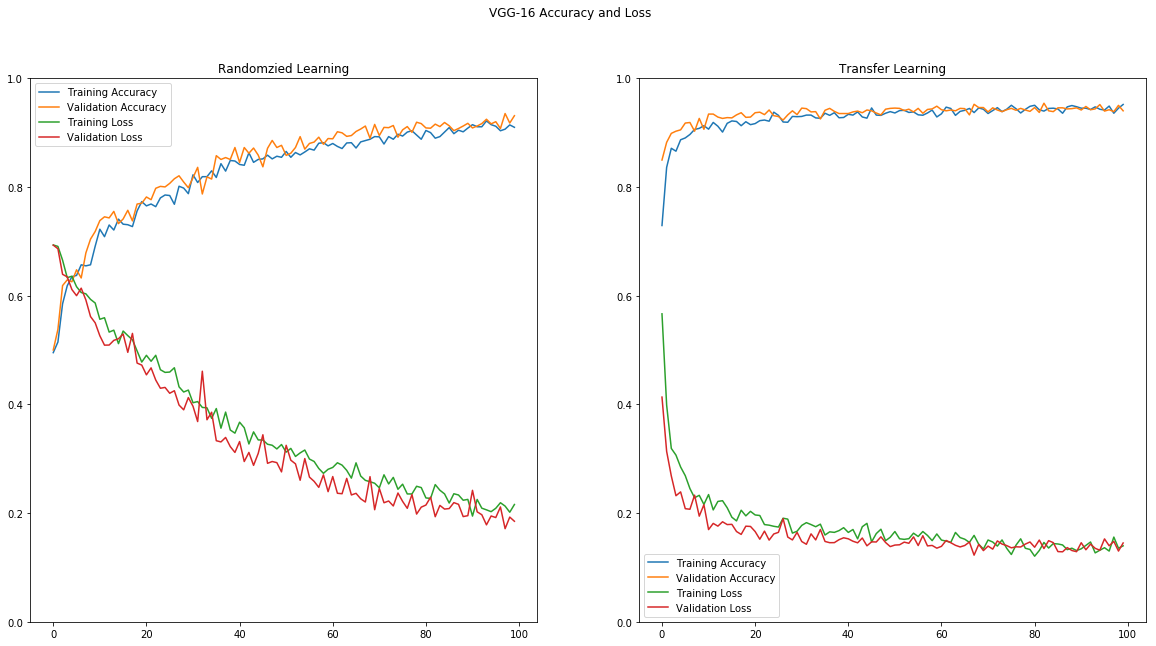

In [19]:
data = raw_vgg16_data
plt.figure(4, figsize=(20,10))
plt.suptitle("VGG-16 Accuracy and Loss")

plt.subplot(121)
plt.plot(data.acc, label="Training Accuracy")
plt.plot(data.val_acc, label="Validation Accuracy")
plt.plot(data.loss, label="Training Loss")
plt.plot(data.val_loss, label="Validation Loss")
plt.ylim(0, 1.0)
plt.legend()
plt.title("Randomzied Learning")

data = transfer_vgg16_data

plt.subplot(122)
plt.plot(data.acc, label="Training Accuracy")
plt.plot(data.val_acc, label="Validation Accuracy")
plt.plot(data.loss, label="Training Loss")
plt.plot(data.val_loss, label="Validation Loss")
plt.ylim(0, 1.0)
plt.legend()
plt.title("Transfer Learning")

plt.show()
plt.savefig("vgg16.png")

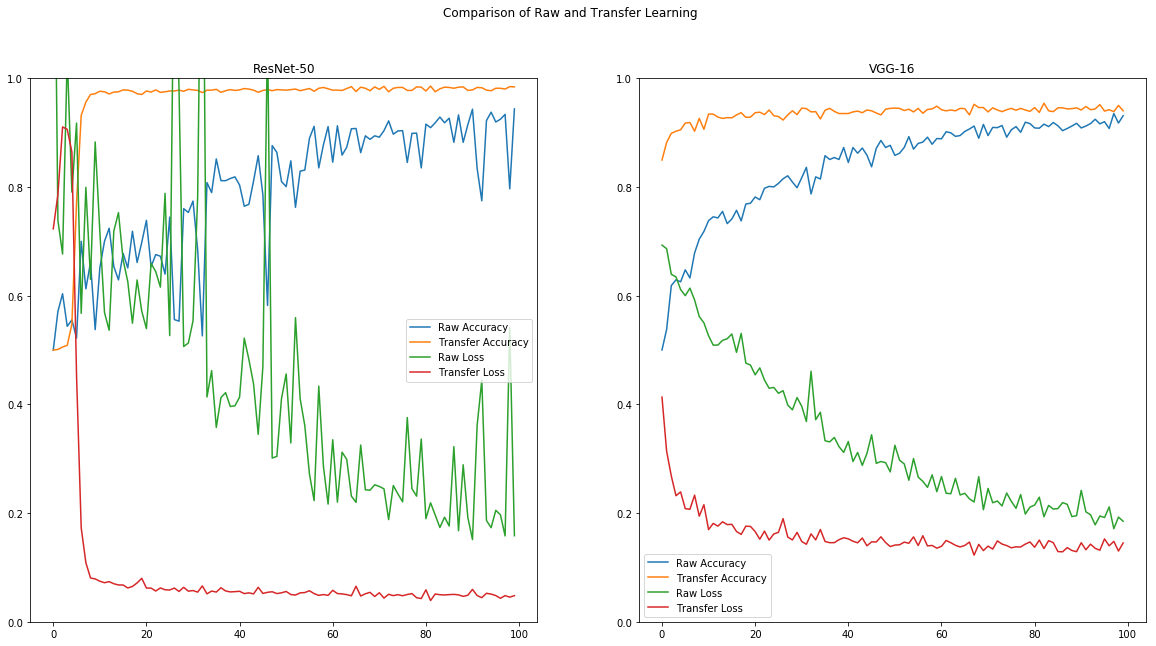

In [40]:
plt.figure(5, figsize=(20,10))
plt.suptitle("Comparison of Raw and Transfer Learning")

plt.subplot(121)
plt.title("ResNet-50")
plt.plot(raw_resnet_data.val_acc, label="Raw Accuracy")
plt.plot(transfer_resnet_data.val_acc, label="Transfer Accuracy")
plt.plot(raw_resnet_data.val_loss, label="Raw Loss")
plt.plot(transfer_resnet_data.val_loss, label="Transfer Loss")
plt.ylim(0, 1.0)
plt.legend()

plt.subplot(122)
plt.title("VGG-16")
plt.plot(raw_vgg16_data.val_acc, label="Raw Accuracy")
plt.plot(transfer_vgg16_data.val_acc, label="Transfer Accuracy")
plt.plot(raw_vgg16_data.val_loss, label="Raw Loss")
plt.plot(transfer_vgg16_data.val_loss, label="Transfer Loss")
plt.ylim(0, 1.0)
plt.legend()

plt.show()
plt.savefig("model_comparison.png")

In [42]:
trans

0.89227642276399999

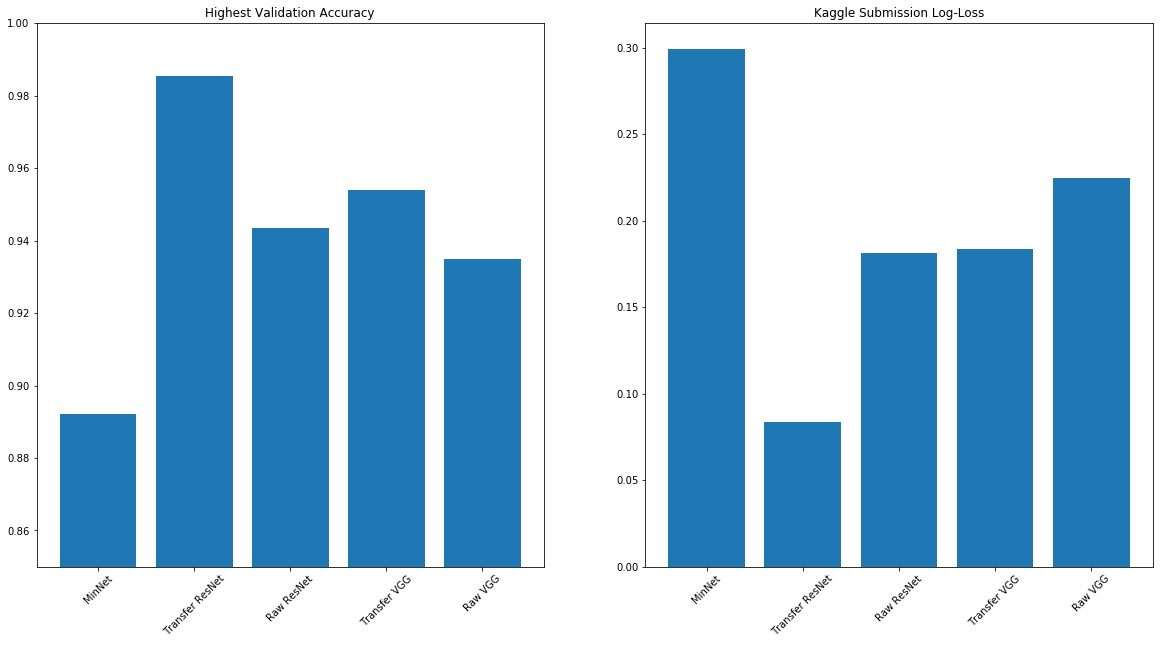

In [49]:
max_acc = [
    minnet_data.val_acc.max(),
    transfer_resnet_data.val_acc.max(),
    raw_resnet_data.val_acc.max(),
    transfer_vgg16_data.val_acc.max(),
    raw_vgg16_data.val_acc.max()
]

test_loss = [
    0.29924,
    0.08386,
    0.18124,
    0.18362,
    0.22483
]

plt.figure(6, figsize=(20., 10.))


plt.subplot(121)
plt.title("Highest Validation Accuracy")
plt.bar([1,2,3,4,5], max_acc, tick_label=['MinNet', 'Transfer ResNet', 'Raw ResNet', 'Transfer VGG', 'Raw VGG'])
plt.xticks(rotation=45)
plt.ylim(0.85, 1.0)

plt.subplot(122)
plt.title("Kaggle Submission Log-Loss")
plt.bar([1,2,3,4,5], test_loss, tick_label=['MinNet', 'Transfer ResNet', 'Raw ResNet', 'Transfer VGG', 'Raw VGG'])
plt.xticks(rotation=45)

plt.show()